In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (20,20)

In [2]:
df = pd.read_csv('flights.csv.gz')

In [3]:
df.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58492 entries, 0 to 58491
Data columns (total 14 columns):
MONTH        58492 non-null int64
DAY          58492 non-null int64
WEEKDAY      58492 non-null int64
AIRLINE      58492 non-null object
ORG_AIR      58492 non-null object
DEST_AIR     58492 non-null object
SCHED_DEP    58492 non-null int64
DEP_DELAY    57659 non-null float64
AIR_TIME     57474 non-null float64
DIST         58492 non-null int64
SCHED_ARR    58492 non-null int64
ARR_DELAY    57474 non-null float64
DIVERTED     58492 non-null int64
CANCELLED    58492 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 6.2+ MB


In [5]:
df.MONTH = df.MONTH.astype("str")
df.DAY = df.DAY.astype("str")
df['DATE'] = df['MONTH'].str.cat(df['DAY'], sep='/')
df = df.drop(columns=['MONTH','DAY'])

In [6]:
#Analizando la data, vemos que hay data faltante, esto esta dado debido en que no se completo la data de AIR_TIME si un viaje fue cancelado, esto sera rellenado con 0 para evitar perder data, algo similar ocurre con el DEP_DELAY
df['AIR_TIME'] = df['AIR_TIME'].fillna(0)
df['DEP_DELAY'] = df['DEP_DELAY'].fillna(0)
df['ARR_DELAY'] = df['ARR_DELAY'].fillna(df['ARR_DELAY'].mean())

## Mostrar el número de vuelos cancelados por aerolínea por día

In [7]:
print('El numero total de vuelos cancelados fue: {}'.format(df['CANCELLED'].value_counts()[1]))

El numero total de vuelos cancelados fue: 881


In [8]:
print('El porcentaje de vuelos cancelados fue: {}'.format(df['CANCELLED'].value_counts('%')[1]))

El porcentaje de vuelos cancelados fue: 0.01506188880530671


In [9]:
cancel_by_day = df[df['CANCELLED'] == 1].loc[:,['DATE','AIRLINE']].reset_index(drop=True)

In [10]:
cancel_by_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 2 columns):
DATE       881 non-null object
AIRLINE    881 non-null object
dtypes: object(2)
memory usage: 13.9+ KB


In [11]:
air_lab = cancel_by_day.AIRLINE.unique()
date_lab = cancel_by_day.DATE.unique()
for label in air_lab:
    day_label = cancel_by_day[cancel_by_day['AIRLINE'] == label]['DATE'].unique()
    for day in day_label:
        print('Aerolinea {} tiene {} vuelos cancelados en la fecha {}'.format(label,cancel_by_day[cancel_by_day['DATE'] == day]['AIRLINE'].value_counts()[label],day))   

Aerolinea MQ tiene 4 vuelos cancelados en la fecha 1/1
Aerolinea MQ tiene 1 vuelos cancelados en la fecha 1/2
Aerolinea MQ tiene 2 vuelos cancelados en la fecha 1/3
Aerolinea MQ tiene 4 vuelos cancelados en la fecha 1/4
Aerolinea MQ tiene 3 vuelos cancelados en la fecha 1/5
Aerolinea MQ tiene 1 vuelos cancelados en la fecha 1/6
Aerolinea MQ tiene 5 vuelos cancelados en la fecha 1/8
Aerolinea MQ tiene 2 vuelos cancelados en la fecha 1/9
Aerolinea MQ tiene 1 vuelos cancelados en la fecha 1/12
Aerolinea MQ tiene 1 vuelos cancelados en la fecha 1/26
Aerolinea MQ tiene 6 vuelos cancelados en la fecha 2/1
Aerolinea MQ tiene 5 vuelos cancelados en la fecha 2/2
Aerolinea MQ tiene 1 vuelos cancelados en la fecha 2/3
Aerolinea MQ tiene 1 vuelos cancelados en la fecha 2/4
Aerolinea MQ tiene 1 vuelos cancelados en la fecha 2/5
Aerolinea MQ tiene 1 vuelos cancelados en la fecha 2/9
Aerolinea MQ tiene 2 vuelos cancelados en la fecha 2/16
Aerolinea MQ tiene 2 vuelos cancelados en la fecha 2/21
Aeroli

Aerolinea OO tiene 1 vuelos cancelados en la fecha 11/11
Aerolinea OO tiene 1 vuelos cancelados en la fecha 11/17
Aerolinea OO tiene 3 vuelos cancelados en la fecha 11/18
Aerolinea OO tiene 2 vuelos cancelados en la fecha 11/21
Aerolinea OO tiene 1 vuelos cancelados en la fecha 12/3
Aerolinea OO tiene 1 vuelos cancelados en la fecha 12/7
Aerolinea OO tiene 1 vuelos cancelados en la fecha 12/8
Aerolinea OO tiene 1 vuelos cancelados en la fecha 12/9
Aerolinea OO tiene 1 vuelos cancelados en la fecha 12/14
Aerolinea OO tiene 4 vuelos cancelados en la fecha 12/18
Aerolinea OO tiene 2 vuelos cancelados en la fecha 12/20
Aerolinea OO tiene 2 vuelos cancelados en la fecha 12/21
Aerolinea OO tiene 1 vuelos cancelados en la fecha 12/22
Aerolinea OO tiene 2 vuelos cancelados en la fecha 12/27
Aerolinea OO tiene 4 vuelos cancelados en la fecha 12/28
Aerolinea AA tiene 1 vuelos cancelados en la fecha 1/1
Aerolinea AA tiene 1 vuelos cancelados en la fecha 1/11
Aerolinea AA tiene 1 vuelos cancelados

Aerolinea EV tiene 1 vuelos cancelados en la fecha 7/6
Aerolinea EV tiene 1 vuelos cancelados en la fecha 7/13
Aerolinea EV tiene 1 vuelos cancelados en la fecha 7/27
Aerolinea EV tiene 2 vuelos cancelados en la fecha 7/31
Aerolinea EV tiene 2 vuelos cancelados en la fecha 8/2
Aerolinea EV tiene 3 vuelos cancelados en la fecha 8/20
Aerolinea EV tiene 1 vuelos cancelados en la fecha 9/25
Aerolinea EV tiene 1 vuelos cancelados en la fecha 11/5
Aerolinea EV tiene 3 vuelos cancelados en la fecha 11/18
Aerolinea EV tiene 1 vuelos cancelados en la fecha 11/20
Aerolinea EV tiene 3 vuelos cancelados en la fecha 11/21
Aerolinea EV tiene 1 vuelos cancelados en la fecha 12/13
Aerolinea EV tiene 1 vuelos cancelados en la fecha 12/24
Aerolinea EV tiene 1 vuelos cancelados en la fecha 12/25
Aerolinea EV tiene 2 vuelos cancelados en la fecha 12/26
Aerolinea EV tiene 2 vuelos cancelados en la fecha 12/27
Aerolinea EV tiene 7 vuelos cancelados en la fecha 12/28
Aerolinea EV tiene 2 vuelos cancelados en

Aerolinea UA tiene 2 vuelos cancelados en la fecha 6/21
Aerolinea UA tiene 1 vuelos cancelados en la fecha 6/22
Aerolinea UA tiene 1 vuelos cancelados en la fecha 6/24
Aerolinea UA tiene 2 vuelos cancelados en la fecha 6/25
Aerolinea UA tiene 1 vuelos cancelados en la fecha 6/26
Aerolinea UA tiene 2 vuelos cancelados en la fecha 6/27
Aerolinea UA tiene 2 vuelos cancelados en la fecha 6/30
Aerolinea UA tiene 1 vuelos cancelados en la fecha 7/8
Aerolinea UA tiene 1 vuelos cancelados en la fecha 7/9
Aerolinea UA tiene 1 vuelos cancelados en la fecha 7/13
Aerolinea UA tiene 1 vuelos cancelados en la fecha 7/16
Aerolinea UA tiene 1 vuelos cancelados en la fecha 7/17
Aerolinea UA tiene 1 vuelos cancelados en la fecha 7/26
Aerolinea UA tiene 1 vuelos cancelados en la fecha 7/27
Aerolinea UA tiene 1 vuelos cancelados en la fecha 7/31
Aerolinea UA tiene 1 vuelos cancelados en la fecha 8/7
Aerolinea UA tiene 1 vuelos cancelados en la fecha 8/17
Aerolinea UA tiene 1 vuelos cancelados en la fecha 

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

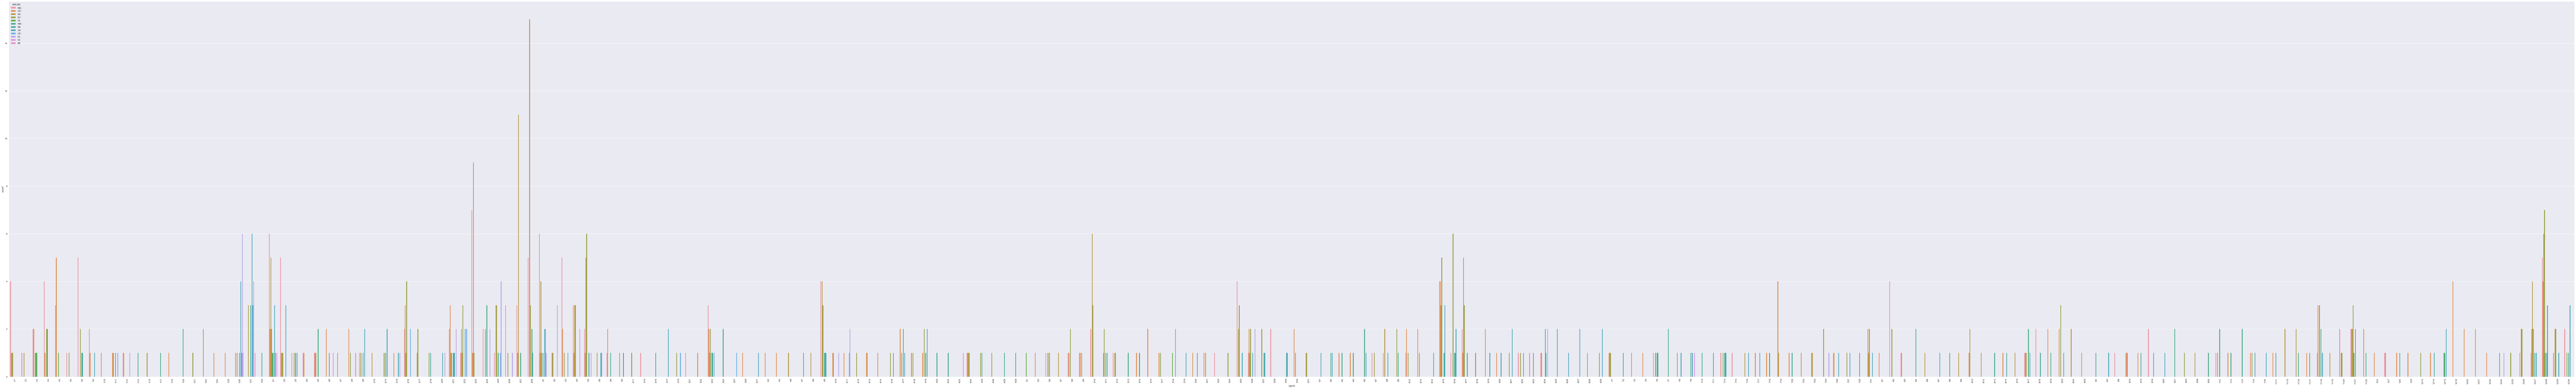

In [12]:
plt.rcParams['figure.figsize'] = (200,30)
sns.countplot(x=cancel_by_day['DATE'], hue = cancel_by_day['AIRLINE'])
plt.xticks(rotation=90)

## Mostrar el número y porcentaje de vuelos cancelados y desviados por día

In [13]:
labels = ['CANCELLED','DIVERTED']
num_fly, porcent_fly = [],[]

for col in labels:
    print('El numero de vuelos {} fue: {}'.format(col,df[col].value_counts()[1]))
    num_fly.append(df[col].value_counts()[1])
    print('El porcentaje de vuelos {} fue: {}'.format(col,df[col].value_counts('%')[1]))
    porcent_fly.append(df[col].value_counts('%')[1])

print('Total Vuelos Cancelados y Desviados: {}'.format(np.sum(num_fly)))
print('Porcentaje Vuelos Cancelados y Desviados: {}'.format(np.sum(porcent_fly)))

El numero de vuelos CANCELLED fue: 881
El porcentaje de vuelos CANCELLED fue: 0.01506188880530671
El numero de vuelos DIVERTED fue: 137
El porcentaje de vuelos DIVERTED fue: 0.0023422006428229503
Total Vuelos Cancelados y Desviados: 1018
Porcentaje Vuelos Cancelados y Desviados: 0.01740408944812966


In [14]:
df_div = df[df['DIVERTED'] == 1].loc[:,['DATE','AIRLINE','DIVERTED','CANCELLED']].reset_index(drop=True)
df_can = df[df['CANCELLED'] == 1].loc[:,['DATE','AIRLINE','DIVERTED','CANCELLED']].reset_index(drop=True)
div_and_cancel = pd.concat([df_div,df_can])

In [15]:
div_and_cancel.head()

,DATE,AIRLINE,DIVERTED,CANCELLED
0,1/4,EV,1,0
1,1/6,EV,1,0
2,1/8,UA,1,0
3,1/8,OO,1,0
4,1/11,WN,1,0


In [16]:
div_and_cancel[div_and_cancel['DATE'] == '1/1']['AIRLINE']

0    MQ
1    OO
2    AA
3    MQ
4    EV
5    MQ
6    MQ
Name: AIRLINE, dtype: object

In [17]:
air_lab = div_and_cancel.AIRLINE.unique()
date_lab = div_and_cancel.DATE.unique()
for label in air_lab:
    day_label = div_and_cancel[div_and_cancel['AIRLINE'] == label]['DATE'].unique()
    for day in day_label:
        print('Aerolinea {} tiene {} vuelos cancelados y desviados con un porcentaje de {} en fecha {}'.format(label,
                                                                                    div_and_cancel[div_and_cancel['DATE'] == day]['AIRLINE'].value_counts()[label],
                                                                                    df[df['DATE'] == day]['AIRLINE'].value_counts('%')[label].round(3),
                                                                                       day))   
        
        

Aerolinea EV tiene 3 vuelos cancelados y desviados con un porcentaje de 0.096 en fecha 1/4
Aerolinea EV tiene 2 vuelos cancelados y desviados con un porcentaje de 0.124 en fecha 1/6
Aerolinea EV tiene 1 vuelos cancelados y desviados con un porcentaje de 0.079 en fecha 1/14
Aerolinea EV tiene 2 vuelos cancelados y desviados con un porcentaje de 0.092 en fecha 3/2
Aerolinea EV tiene 1 vuelos cancelados y desviados con un porcentaje de 0.161 en fecha 3/25
Aerolinea EV tiene 2 vuelos cancelados y desviados con un porcentaje de 0.079 en fecha 4/16
Aerolinea EV tiene 1 vuelos cancelados y desviados con un porcentaje de 0.088 en fecha 5/18
Aerolinea EV tiene 1 vuelos cancelados y desviados con un porcentaje de 0.122 en fecha 6/23
Aerolinea EV tiene 1 vuelos cancelados y desviados con un porcentaje de 0.119 en fecha 7/12
Aerolinea EV tiene 1 vuelos cancelados y desviados con un porcentaje de 0.106 en fecha 8/12
Aerolinea EV tiene 1 vuelos cancelados y desviados con un porcentaje de 0.13 en fec

Aerolinea EV tiene 7 vuelos cancelados y desviados con un porcentaje de 0.085 en fecha 12/28
Aerolinea EV tiene 2 vuelos cancelados y desviados con un porcentaje de 0.107 en fecha 12/29
Aerolinea EV tiene 1 vuelos cancelados y desviados con un porcentaje de 0.104 en fecha 12/30
Aerolinea UA tiene 1 vuelos cancelados y desviados con un porcentaje de 0.164 en fecha 1/8
Aerolinea UA tiene 4 vuelos cancelados y desviados con un porcentaje de 0.119 en fecha 2/1
Aerolinea UA tiene 3 vuelos cancelados y desviados con un porcentaje de 0.127 en fecha 3/1
Aerolinea UA tiene 1 vuelos cancelados y desviados con un porcentaje de 0.136 en fecha 3/23
Aerolinea UA tiene 1 vuelos cancelados y desviados con un porcentaje de 0.134 en fecha 4/1
Aerolinea UA tiene 3 vuelos cancelados y desviados con un porcentaje de 0.137 en fecha 4/19
Aerolinea UA tiene 1 vuelos cancelados y desviados con un porcentaje de 0.141 en fecha 5/5
Aerolinea UA tiene 1 vuelos cancelados y desviados con un porcentaje de 0.123 en f

Aerolinea OO tiene 1 vuelos cancelados y desviados con un porcentaje de 0.104 en fecha 7/21
Aerolinea OO tiene 1 vuelos cancelados y desviados con un porcentaje de 0.122 en fecha 7/28
Aerolinea OO tiene 1 vuelos cancelados y desviados con un porcentaje de 0.13 en fecha 8/4
Aerolinea OO tiene 1 vuelos cancelados y desviados con un porcentaje de 0.096 en fecha 9/30
Aerolinea OO tiene 1 vuelos cancelados y desviados con un porcentaje de 0.14 en fecha 12/4
Aerolinea OO tiene 5 vuelos cancelados y desviados con un porcentaje de 0.092 en fecha 12/18
Aerolinea OO tiene 3 vuelos cancelados y desviados con un porcentaje de 0.087 en fecha 12/20
Aerolinea OO tiene 1 vuelos cancelados y desviados con un porcentaje de 0.1 en fecha 12/24
Aerolinea OO tiene 3 vuelos cancelados y desviados con un porcentaje de 0.122 en fecha 12/27
Aerolinea OO tiene 1 vuelos cancelados y desviados con un porcentaje de 0.119 en fecha 12/29
Aerolinea OO tiene 1 vuelos cancelados y desviados con un porcentaje de 0.169 en

Aerolinea OO tiene 1 vuelos cancelados y desviados con un porcentaje de 0.12 en fecha 12/8
Aerolinea OO tiene 1 vuelos cancelados y desviados con un porcentaje de 0.108 en fecha 12/9
Aerolinea OO tiene 1 vuelos cancelados y desviados con un porcentaje de 0.097 en fecha 12/14
Aerolinea OO tiene 2 vuelos cancelados y desviados con un porcentaje de 0.092 en fecha 12/21
Aerolinea OO tiene 1 vuelos cancelados y desviados con un porcentaje de 0.103 en fecha 12/22
Aerolinea OO tiene 4 vuelos cancelados y desviados con un porcentaje de 0.114 en fecha 12/28
Aerolinea WN tiene 2 vuelos cancelados y desviados con un porcentaje de 0.148 en fecha 1/11
Aerolinea WN tiene 1 vuelos cancelados y desviados con un porcentaje de 0.147 en fecha 2/26
Aerolinea WN tiene 1 vuelos cancelados y desviados con un porcentaje de 0.148 en fecha 4/15
Aerolinea WN tiene 1 vuelos cancelados y desviados con un porcentaje de 0.179 en fecha 4/27
Aerolinea WN tiene 1 vuelos cancelados y desviados con un porcentaje de 0.143

Aerolinea DL tiene 3 vuelos cancelados y desviados con un porcentaje de 0.176 en fecha 6/24
Aerolinea DL tiene 1 vuelos cancelados y desviados con un porcentaje de 0.182 en fecha 6/25
Aerolinea DL tiene 1 vuelos cancelados y desviados con un porcentaje de 0.152 en fecha 6/28
Aerolinea DL tiene 1 vuelos cancelados y desviados con un porcentaje de 0.187 en fecha 6/29
Aerolinea DL tiene 1 vuelos cancelados y desviados con un porcentaje de 0.183 en fecha 7/1
Aerolinea DL tiene 2 vuelos cancelados y desviados con un porcentaje de 0.193 en fecha 7/24
Aerolinea DL tiene 1 vuelos cancelados y desviados con un porcentaje de 0.202 en fecha 7/28
Aerolinea DL tiene 1 vuelos cancelados y desviados con un porcentaje de 0.181 en fecha 7/31
Aerolinea DL tiene 1 vuelos cancelados y desviados con un porcentaje de 0.22 en fecha 8/7
Aerolinea DL tiene 1 vuelos cancelados y desviados con un porcentaje de 0.218 en fecha 8/11
Aerolinea DL tiene 1 vuelos cancelados y desviados con un porcentaje de 0.198 en fe

Aerolinea AA tiene 1 vuelos cancelados y desviados con un porcentaje de 0.153 en fecha 8/17
Aerolinea AA tiene 2 vuelos cancelados y desviados con un porcentaje de 0.173 en fecha 8/24
Aerolinea AA tiene 1 vuelos cancelados y desviados con un porcentaje de 0.168 en fecha 9/10
Aerolinea AA tiene 1 vuelos cancelados y desviados con un porcentaje de 0.159 en fecha 9/28
Aerolinea AA tiene 2 vuelos cancelados y desviados con un porcentaje de 0.186 en fecha 11/15
Aerolinea AA tiene 2 vuelos cancelados y desviados con un porcentaje de 0.183 en fecha 11/16
Aerolinea AA tiene 1 vuelos cancelados y desviados con un porcentaje de 0.208 en fecha 11/19
Aerolinea AA tiene 1 vuelos cancelados y desviados con un porcentaje de 0.153 en fecha 11/20
Aerolinea AA tiene 2 vuelos cancelados y desviados con un porcentaje de 0.218 en fecha 11/22
Aerolinea AA tiene 4 vuelos cancelados y desviados con un porcentaje de 0.14 en fecha 12/27
Aerolinea AA tiene 6 vuelos cancelados y desviados con un porcentaje de 0.2

Aerolinea MQ tiene 2 vuelos cancelados y desviados con un porcentaje de 0.083 en fecha 12/30
Aerolinea US tiene 1 vuelos cancelados y desviados con un porcentaje de 0.05 en fecha 3/5
Aerolinea US tiene 1 vuelos cancelados y desviados con un porcentaje de 0.062 en fecha 1/11
Aerolinea US tiene 1 vuelos cancelados y desviados con un porcentaje de 0.023 en fecha 1/26
Aerolinea US tiene 3 vuelos cancelados y desviados con un porcentaje de 0.061 en fecha 1/27
Aerolinea US tiene 1 vuelos cancelados y desviados con un porcentaje de 0.042 en fecha 2/1
Aerolinea US tiene 2 vuelos cancelados y desviados con un porcentaje de 0.056 en fecha 2/16
Aerolinea US tiene 2 vuelos cancelados y desviados con un porcentaje de 0.067 en fecha 2/22
Aerolinea US tiene 1 vuelos cancelados y desviados con un porcentaje de 0.045 en fecha 2/25
Aerolinea US tiene 2 vuelos cancelados y desviados con un porcentaje de 0.042 en fecha 3/1
Aerolinea US tiene 1 vuelos cancelados y desviados con un porcentaje de 0.036 en fe

## Para cada origen y destino, mostrar el total de vuelos, el número y porcentaje de vuelos cancelados y generar estadísticas para el tiempo de vuelo

In [18]:
print('Vuelos ordenados por Origen')
df['ORG_AIR'].value_counts()

Vuelos ordenados por Origen


ATL    10413
ORD     8394
DFW     7121
LAX     5889
DEN     5857
PHX     4603
SFO     4402
IAH     4384
LAS     4019
MSP     3410
Name: ORG_AIR, dtype: int64

Text(0.5, 1.0, 'Cantidad de Vuelos segun su Origen')

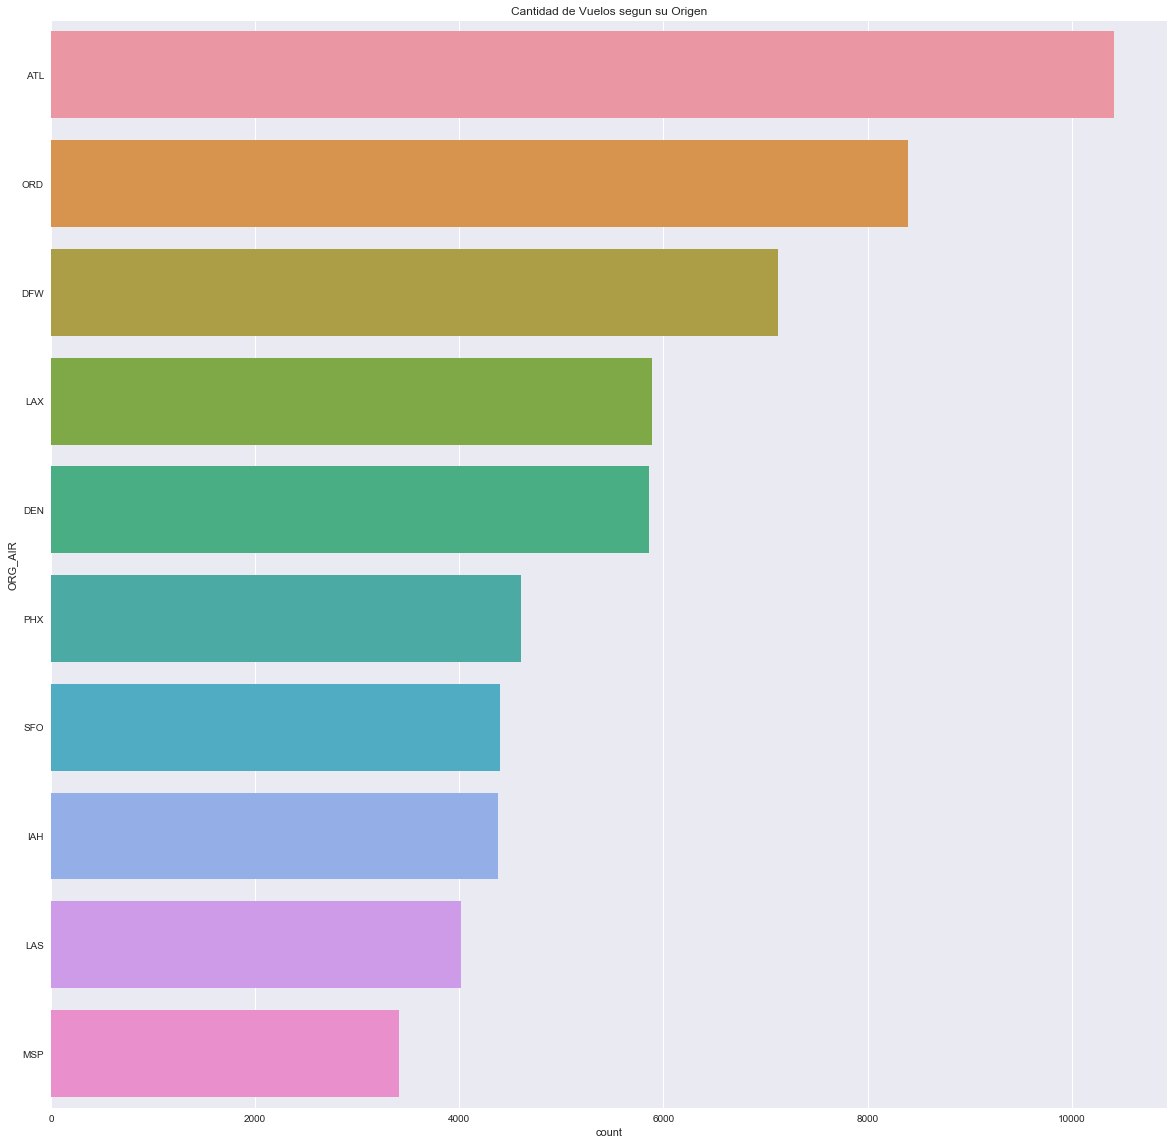

In [37]:
plt.rcParams['figure.figsize'] = (20,20)
sns.countplot(y=df['ORG_AIR'], order = df['ORG_AIR'].value_counts().index)
plt.title('Cantidad de Vuelos segun su Origen')

In [20]:
print('Numero de viajes en base a los viajes cancelados y su origen')
df[df['CANCELLED'] == 1]['ORG_AIR'].value_counts()

Numero de viajes en base a los viajes cancelados y su origen


ORD    259
DFW    187
SFO     88
IAH     74
LAX     70
ATL     69
DEN     61
PHX     32
MSP     24
LAS     17
Name: ORG_AIR, dtype: int64

In [21]:
print('Porcentajes en base a los viajes cancelados y su origen')
df[df['CANCELLED'] == 1]['ORG_AIR'].value_counts('%')

Porcentajes en base a los viajes cancelados y su origen


ORD    0.293984
DFW    0.212259
SFO    0.099886
IAH    0.083995
LAX    0.079455
ATL    0.078320
DEN    0.069240
PHX    0.036322
MSP    0.027242
LAS    0.019296
Name: ORG_AIR, dtype: float64

In [22]:
print('Cantidad de Destinos')
df['DEST_AIR'].value_counts()

Cantidad de Destinos


LAX    1991
SFO    1637
ORD    1634
DEN    1581
DFW    1454
       ... 
INL       4
CEC       2
IMT       2
ITO       2
FAI       1
Name: DEST_AIR, Length: 271, dtype: int64

Text(0.5, 1.0, 'Cantidad de Vuelos segun su Destino')

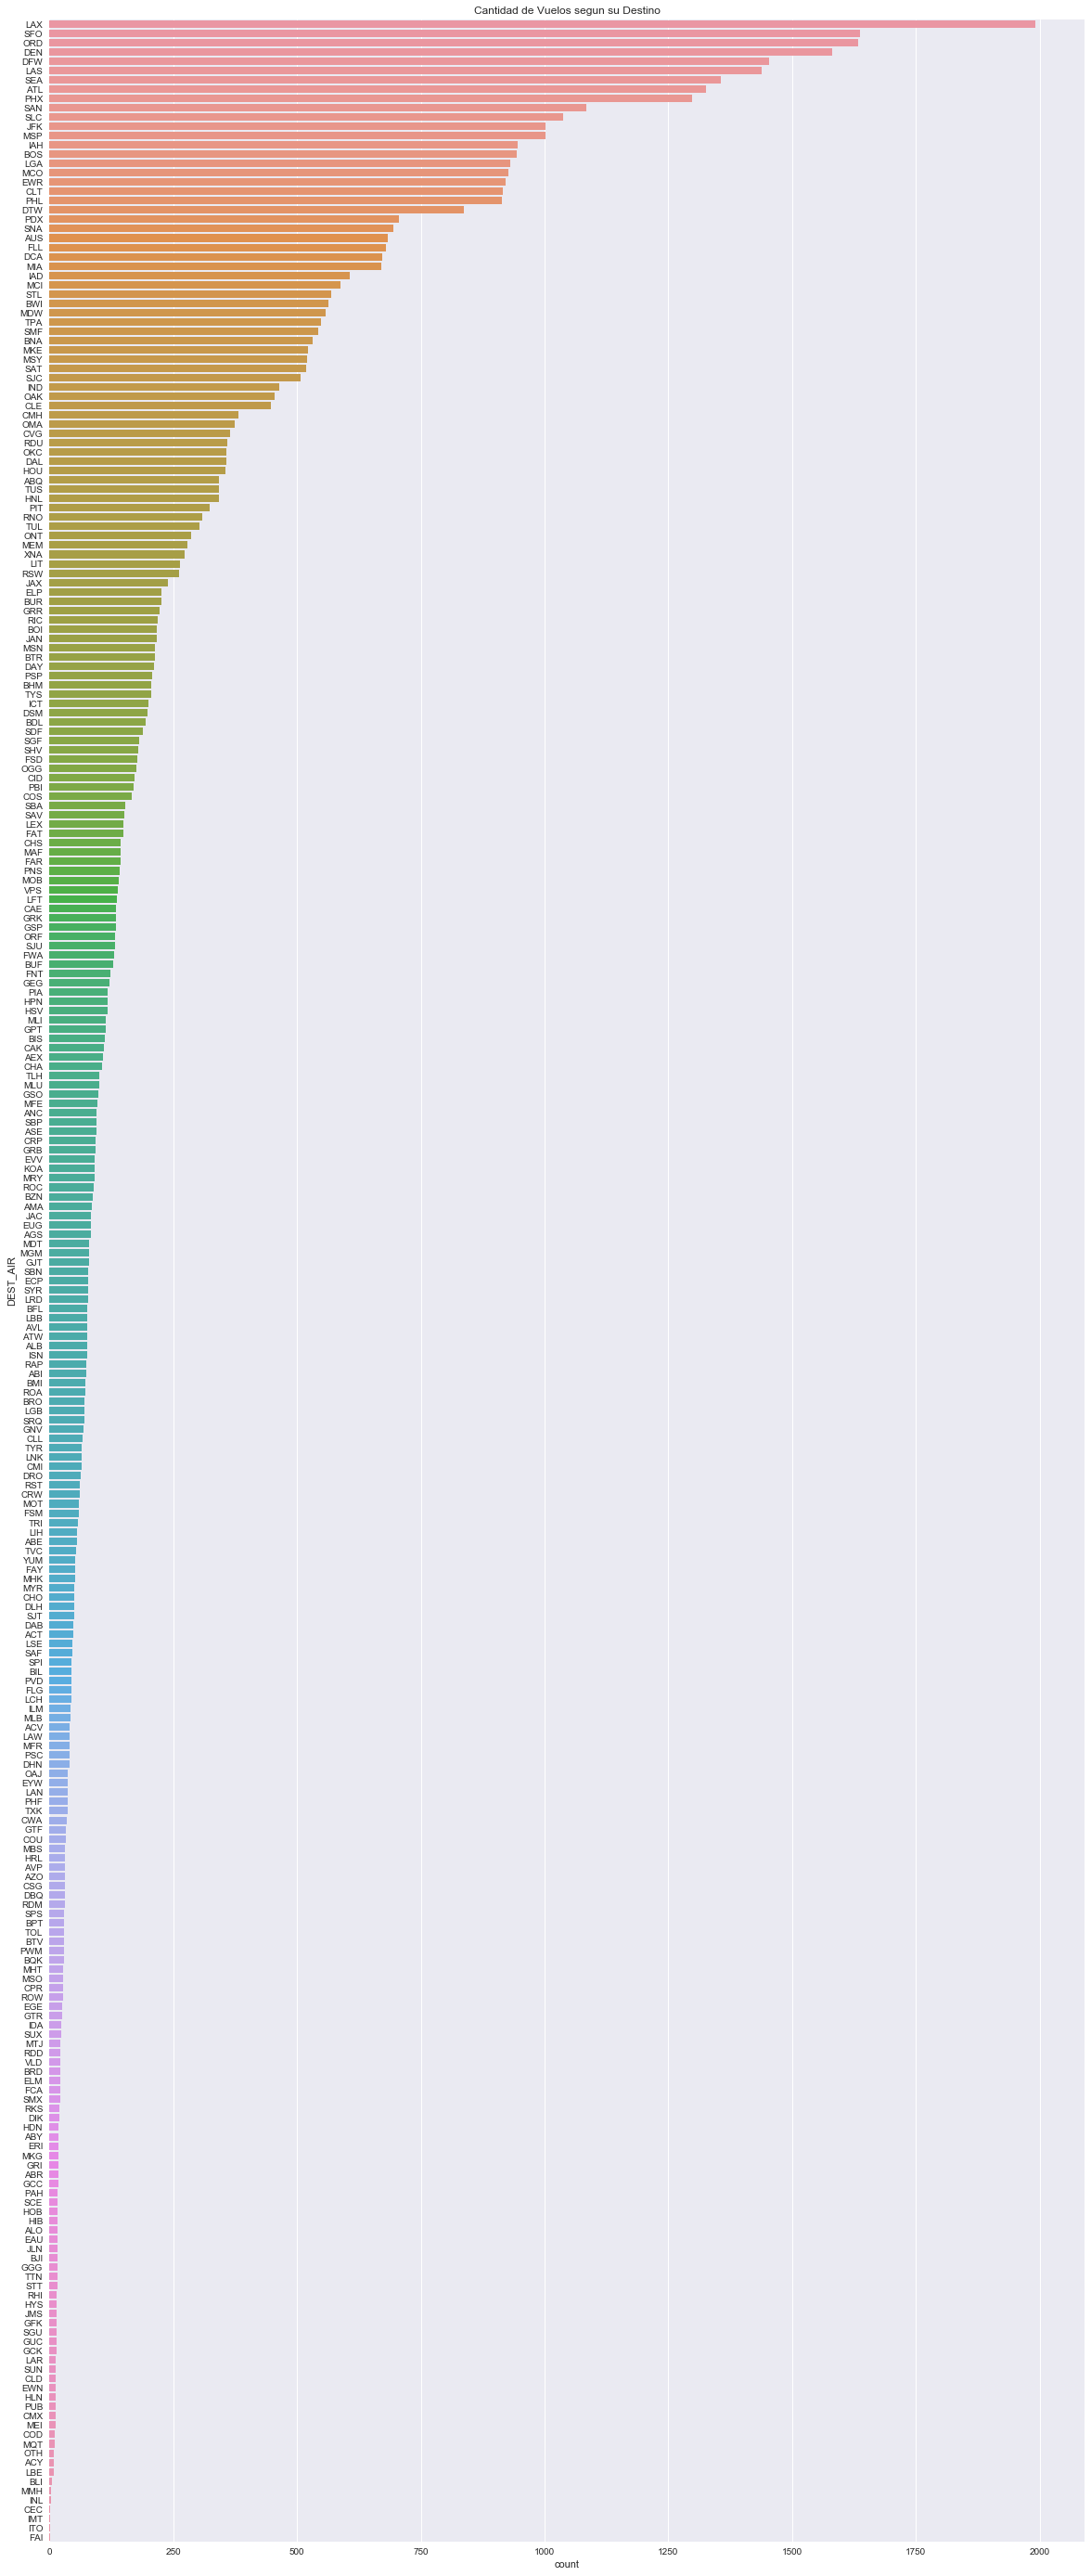

In [23]:
plt.rcParams['figure.figsize'] = (20,50)
sns.countplot(y=df['DEST_AIR'], order = df['DEST_AIR'].value_counts().index)
plt.title('Cantidad de Vuelos segun su Destino')

In [24]:
print('Numero de viajes en base a los viajes cancelados y su destino')
df[df['CANCELLED'] == 1]['DEST_AIR'].value_counts()

Numero de viajes en base a los viajes cancelados y su destino


LGA    31
LAX    29
DFW    27
EWR    25
ORD    22
       ..
DAL     1
SAV     1
FLG     1
LSE     1
MDT     1
Name: DEST_AIR, Length: 195, dtype: int64

In [25]:
print('Porcentajes en base a los viajes cancelados y su destino')
df[df['CANCELLED'] == 1]['DEST_AIR'].value_counts('%')

Porcentajes en base a los viajes cancelados y su destino


LGA    0.035187
LAX    0.032917
DFW    0.030647
EWR    0.028377
ORD    0.024972
         ...   
DAL    0.001135
SAV    0.001135
FLG    0.001135
LSE    0.001135
MDT    0.001135
Name: DEST_AIR, Length: 195, dtype: float64

In [26]:
df['AIR_TIME'].describe()

count    58492.000000
mean       113.910945
std         72.652425
min          0.000000
25%         59.000000
50%         96.000000
75%        150.000000
max        577.000000
Name: AIR_TIME, dtype: float64

In [27]:
print('Analizando los tiempos de vuelo tenemos que su promedio es {} min , su desviacion es {} min ,su tiempo minimo fue {} min y su maximo {} min'.format(df['AIR_TIME'].describe()['mean'].round(2),df['AIR_TIME'].describe()['std'].round(2),df['AIR_TIME'].describe()['min'],df['AIR_TIME'].describe()['max']))

Analizando los tiempos de vuelo tenemos que su promedio es 113.91 min , su desviacion es 72.65 min ,su tiempo minimo fue 0.0 min y su maximo 577.0 min


## Mostrar la distribución de aerolíneas que vuelan en los siguientes rangos de distancias:  [0, 200, 500, 1000, 2000, 2001+]

In [28]:
def count_dist(inicio, fin=9999999999):
    return ((df.DIST > inicio) & (df.DIST <= fin)).value_counts()

In [29]:
scores = {   
        'Viajes entre 0 y 200':count_dist(0,200) ,
        'Viajes entre 200 y 500':count_dist(200,500) , 
        'Viajes entre 500 y 1000':count_dist(500,1000) , 
        'Viajes entre 1000 y 2000':count_dist(1000,2000) , 
        'Viajes sobre 2000':count_dist(2001)}
scores = pd.DataFrame(scores)

In [30]:
print('Viajes entre 0 y 200 km {} '.format(count_dist(0,200)[True]))

Viajes entre 0 y 200 km 3719 


In [31]:
print('Viajes entre 200 y 500 km {} '.format(count_dist(200,500)[True]))

Viajes entre 200 y 500 km 15874 


In [32]:
print('Viajes entre 500 y 1000 km {} '.format(count_dist(500,1000)[True]))

Viajes entre 500 y 1000 km 20659 


In [33]:
print('Viajes entre 100 y 2000 km {} '.format(count_dist(1000,2000)[True]))

Viajes entre 100 y 2000 km 14186 


In [34]:
print('Viajes superior a 2001km {} '.format(count_dist(2001)[True]))

Viajes superior a 2001km 4054 


In [35]:
scores.head()

,Viajes entre 0 y 200,Viajes entre 200 y 500,Viajes entre 500 y 1000,Viajes entre 1000 y 2000,Viajes sobre 2000
False,54773,42618,37833,44306,54438
True,3719,15874,20659,14186,4054


##  Bonus: Generar un par de gráficos para visualizar el dataset

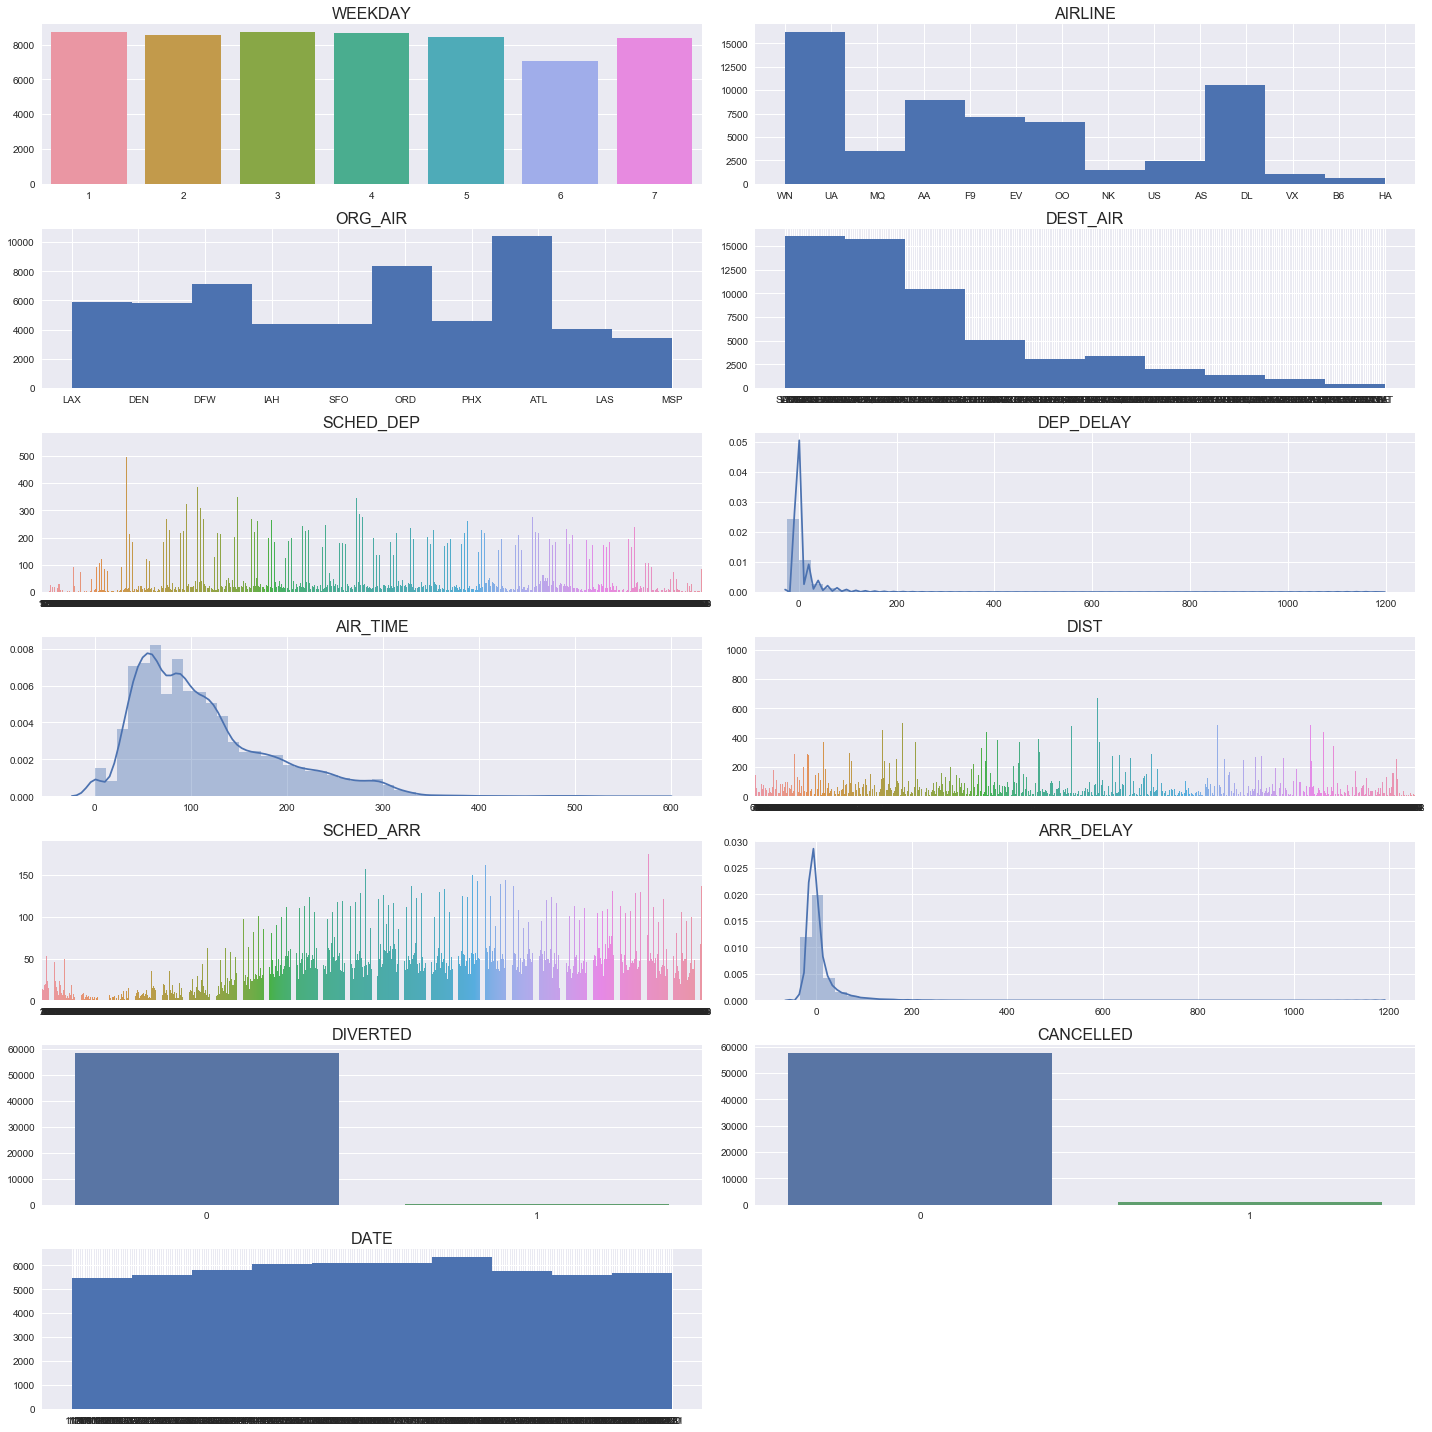

In [36]:
plt.rcParams['figure.figsize'] = (20,20)
rows = 7
cols = 2
for index , (colname,serie) in enumerate(df.iteritems()):
    plt.subplot(rows,cols, index+1)
    if pd.api.types.is_float_dtype(serie) is True:
        sns.distplot(serie)
    elif pd.api.types.is_integer_dtype(serie) is True:
        sns.countplot(serie)
    elif pd.api.types.is_object_dtype(serie) is True:
        plt.hist(serie)
    plt.title(colname, fontsize=16)
    plt.xlabel(''); plt.ylabel('');plt.tight_layout()